# `LINEAR REGRESSION - California Housing Dataset`

### Assumptions of the Classical Linear Regression Model

#### 1. Linearity
- The regression model is linear in the parameters; it may or may not be linear in the variables. 
- This can be expressed as: 
$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_k X_k + \epsilon $

#### 2. Independence
- The observations are independent of each other.
- This implies that the value of the dependent variable for one observation is not influenced by the value of the dependent variable for another observation.

#### 3. Conditional Mean of Errors
- Given the value of Xi, the expected, or mean, value of the disturbance term ε is zero.
- Mathematically,
$ E(\epsilon_i | X_i) = 0 $

#### 4. Homoscedasticity
- The variance of each εi is constant, or homoscedastic (homo means equal and scedastic means variance).
- Mathematically, 
$ \text{Var}(\epsilon_i) = \sigma^2 $ 
  for all i .

#### 5. No Autocorrelation
- There is no correlation between two error terms.
- Mathematically,
$ \text{Cov}(\epsilon_i, \epsilon_j) = 0 $ for i ≠ j


#### 6. No Perfect Multicollinearity
- The independent variables are not perfectly linearly related.
- This means that no independent variable is a perfect linear function of one or more other independent variables.

#### 7. Exogeneity
- The independent variables are uncorrelated with the error term.
- This can be expressed as 
$ \text{Cov}(X_i, \epsilon_i) = 0 $
  for all i.

#### 8. Normality of Errors
- For hypothesis testing, the error term ε follows the normal distribution with mean zero and (homoscedastic) variance.
- Mathematically, 
$ \epsilon_i \sim \text{Normal}(0, \sigma^2) $

##### <b> By ensuring these assumptions hold, the linear regression model provides unbiased, consistent, and efficient estimates of the coefficients $( \beta_0, \beta_1, \ldots, \beta_k )$.

## Problem Definition: 

- Analysis of Median House Value in California Housing dataset using Linear Regression. 

## Data:

- The California Housing dataset is a popular dataset provided by `sklearn` that contains data on housing in California. 
- It includes various features related to the properties and their surroundings, along with the target variable, which is the median house value.

### Dataset Description
The dataset consists of 20,640 samples and 8 features. The features include various socio-economic attributes and geographical information. Below is a detailed description of each feature:

1. `MedInc`: Median income in block group.
2. `HouseAge`: Median house age in block group.
3. `AveRooms`: Average number of rooms per household.
4. `AveBedrms`: Average number of bedrooms per household.
5. `Population`: Block group population.
6. `AveOccup`: Average number of household members.
7. `Latitude`: Block group latitude.
8. `Longitude`: Block group longitude.

The target variable is:

- `MedHouseVal`: Median house value in $100,000s.



## 1. Import Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

## 2. Load Data

In [7]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [8]:
df = pd.DataFrame(california.data, columns=california.feature_names)
#Add the target column to the dataframe
df['MedHouseVal'] = california.target

In [9]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

## 3. Missing Data Analysis
If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where missing values are present. 

In [11]:
# Printing total number of missing data
df.isnull().sum().sort_values(ascending=False)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## 4. Spliting the dataset into Train & Test

In [13]:
y = df['MedHouseVal']
X = df.drop(columns=['MedHouseVal'])

In [14]:
# Let us now split the dataset into train & test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [15]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (16512, 8)
X_test (4128, 8)
y_train (16512,)
y_test (4128,)


## 5. Pandas Profiling Report

In [17]:
from ydata_profiling import ProfileReport 

In [18]:
pf = ProfileReport(X_train,explorative=True)

In [19]:
pf

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
#To save the report
#pf.to_file("Pandas Profiling Report.html")

## 6. Data Preparation

### 6.1 Feature Engineering

#### 6.1.1 Yeo-Johnson Power Transformation
- Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to `heteroscedasticity`, or other situations where `normality` is desired.
- The optimal parameter for stabilizing variance and minimizing skewness is estimated through `maximum likelihood`. 
- Unlike the Box-Cox transformation, Yeo-Johnson Power Transformation can handle both positive and negative values.
- By default, **zero mean, unit-variance normalization** is applied to the transformed data.

In [24]:
from sklearn.preprocessing import PowerTransformer

pt1 = PowerTransformer(method='yeo-johnson')
X_train = pt1.fit_transform(X_train)

The `lambda` values for the Yeo-Johnson transformation are parameters that optimize the transformation to best approximate a normal distribution for the given data.

In [26]:
pt1.lambdas_

array([-0.18937283,  0.81017635, -0.53702319, -4.33179978,  0.23064716,
       -0.9325632 , -5.47303157,  8.04799277])

In [27]:
# Converting to Pandas DataFrame
X_train = pd.DataFrame(X_train)
X_train.head()

0         1         2         3         4         5         6  \
0  0.414754 -1.921393  1.444705  0.896127 -1.966682  0.858764 -0.838722   
1  0.491826  1.761074  0.130526  0.388785  0.323580  0.661007  1.042717   
2  0.250740 -0.162235 -0.373492 -0.082114 -0.215766 -0.027992 -0.838722   
3 -1.785685  0.755827 -1.676031 -0.436925 -0.630163  0.986486 -0.719936   
4 -0.214024  1.761074 -0.867931 -0.108089 -0.069065 -1.492986 -0.674800   

              7  
0  4.329870e-15  
1 -5.939693e-15  
2  3.247402e-15  
3  2.636780e-15  
4  2.414735e-15

#### 6.1.2 Handling Outliers 

##### 6.1.2.1 Visualization using Boxplot

<Axes: >

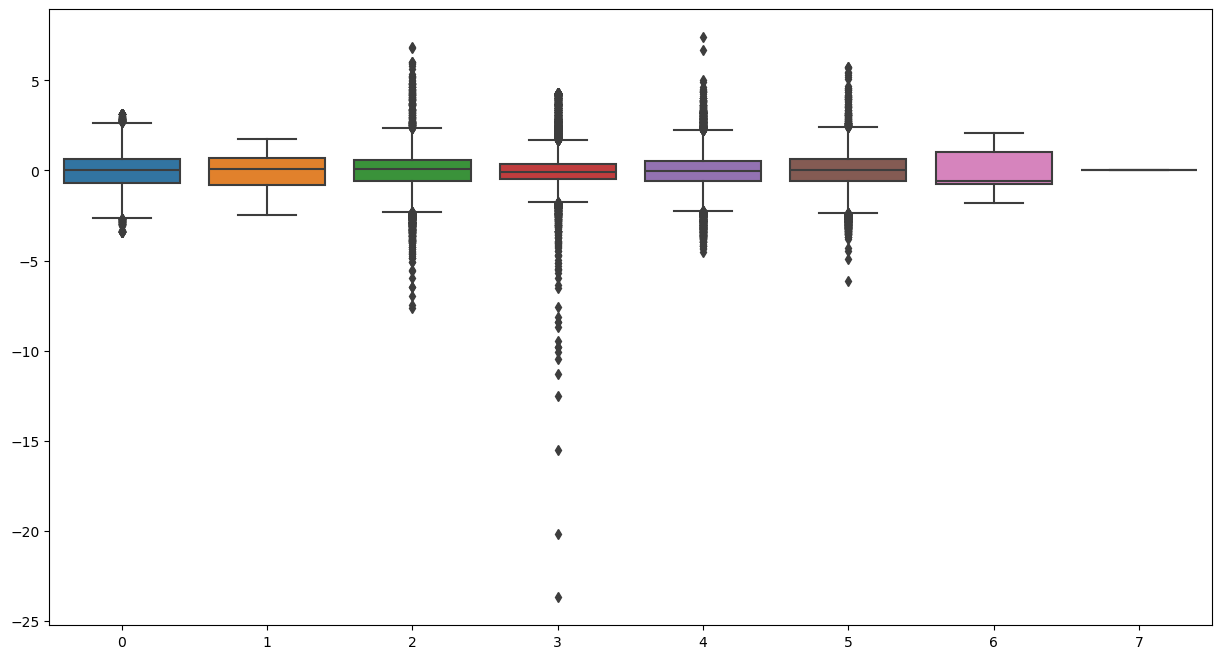

In [30]:
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=X_train, ax=ax)

##### 6.1.2.2 Using Statistical Methods

<b>Replacing Outliers with Upper/Lower Bound Using IQR:</b>

Replacing outliers with upper/lower bounds using IQR involves calculating the interquartile range (IQR) of a numerical column. Outliers are values above Q3 + 1.5 * IQR or below Q1 - 1.5 * IQR. These outliers are then replaced with the nearest boundary (either Q3 + 1.5 * IQR or Q1 - 1.5 * IQR).

In [33]:
for column in X_train.columns:
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    X_train[column] = np.where(X_train[column] > UL, UL, X_train[column])
    X_train[column] = np.where(X_train[column] < LL, LL, X_train[column])

<Axes: >

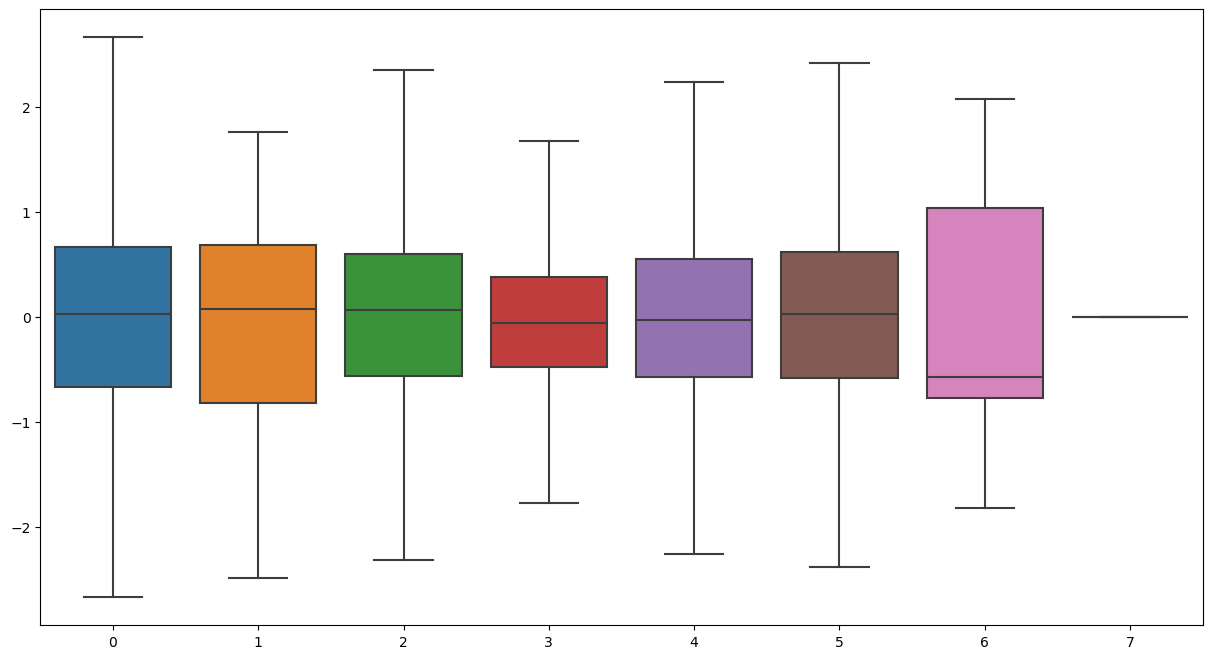

In [34]:
fig,ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=X_train, ax=ax)

#### 6.1.3 Handling Skewness
- If skewness is less than -1 or greater than +1, the distribution is highly skewed.
- If skewness is between -1 and -1/2 or between +1/2 and +1, the distribution is moderately skewed.
- If skewness is between -1/2 and +1/2, the distribution is approximately skewed.

##### 6.1.3.1 Visualization using Histogram

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

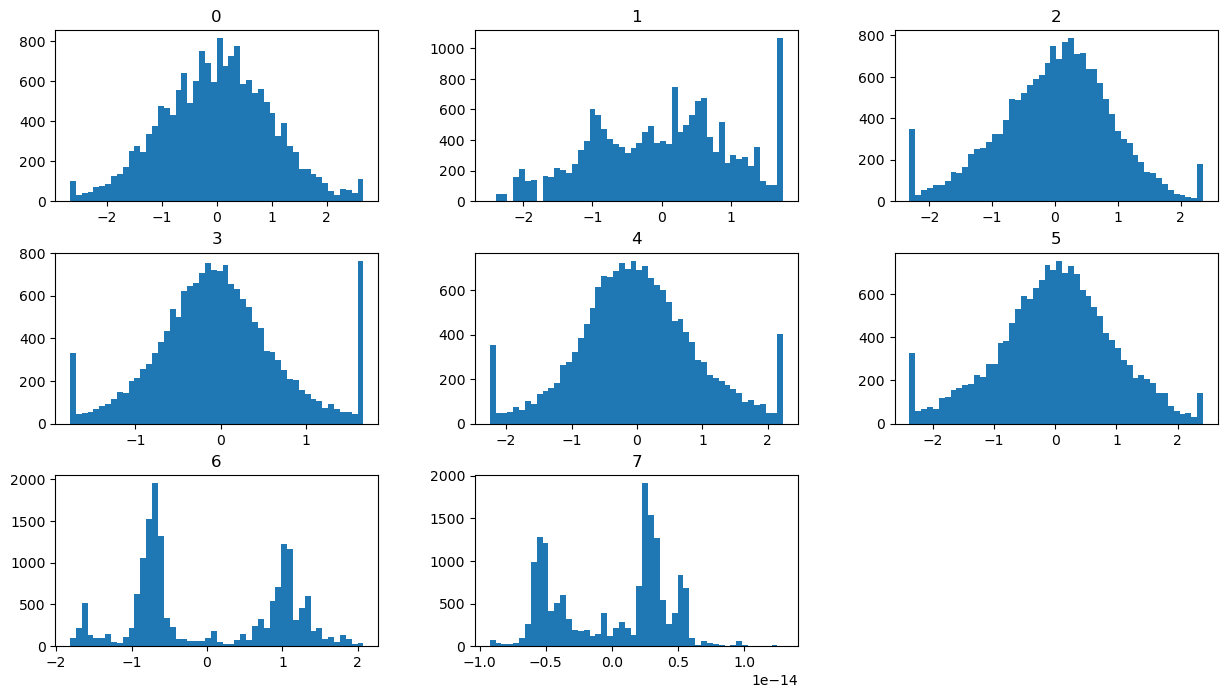

In [37]:
X_train.hist(figsize=(15,8),bins=50,grid=False)

##### 6.1.3.2 Calculating Skewness using `skew`

In [39]:
from scipy.stats import skew
# Calculate skewness
skewness = X_train.apply(skew)
print("Skewness of Features:\n", skewness)

Skewness of Features:
 0   -0.009660
1   -0.113684
2   -0.221505
3    0.211391
4    0.081460
5   -0.157141
6    0.156150
7   -0.195455
dtype: float64


In [40]:
# Identify moderately skewed columns
moderately_skewed_columns = skewness[(skewness >= 0.5) | (skewness <= -0.5)].index
print("Moderately skewed features:\n", moderately_skewed_columns)

Moderately skewed features:
 Index([], dtype='int64')


#### 6.1.4 Handling Multicollinearity

1. Multicollinearity occurs when two or more predictor variables in regression model are highly correlated with each other.
2. The VIF quantifies how much the variance of the coefficient estimates are inflated due to multicollinearity.
##### VIF= $ \frac{1}{1 - R_{i}^2} $
3. A thumb rule for interpreting the variance inflation factor:
- 1 = not correlated
- Between 1 and 5 = moderately correlated
- Greater than 5 = highy correlated

##### 6.1.4.1 Correlation Plot

          0         1         2         3         4         5         6  \
0  1.000000 -0.143359  0.623967 -0.230433  0.028825 -0.042452 -0.070697   
1 -0.143359  1.000000 -0.219725 -0.136449 -0.284005 -0.010756  0.029880   
2  0.623967 -0.219725  1.000000  0.170556 -0.095287  0.020973  0.135583   
3 -0.230433 -0.136449  0.170556  1.000000  0.008587 -0.129977  0.050382   
4  0.028825 -0.284005 -0.095287  0.008587  1.000000  0.224083 -0.142603   
5 -0.042452 -0.010756  0.020973 -0.129977  0.224083  1.000000 -0.126948   
6 -0.070697  0.029880  0.135583  0.050382 -0.142603 -0.126948  1.000000   
7 -0.017750 -0.112611 -0.072624  0.020531  0.126821  0.152815 -0.934884   

          7  
0 -0.017750  
1 -0.112611  
2 -0.072624  
3  0.020531  
4  0.126821  
5  0.152815  
6 -0.934884  
7  1.000000  


Text(0.5, 1.0, 'Correlation between features')

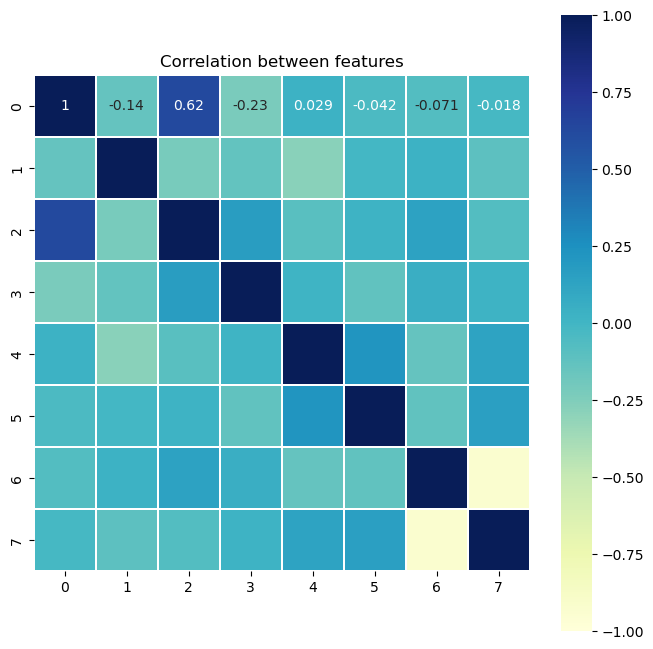

In [43]:
corr=X_train.corr()
print(corr)
plt.figure(figsize=(8,8))

sns.heatmap(corr,
           cmap='YlGnBu',vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True,square=True);
plt.title('Correlation between features')

# 0.0 - 0.2 -> Weak Correlation
# 0.3 - 0.6 -> Moderate Correlation
# 0.7 - 1.0 -> Strong Correlation
# 1 perfect positive
# -1 perfect negative

C:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Strong Correlation between features')

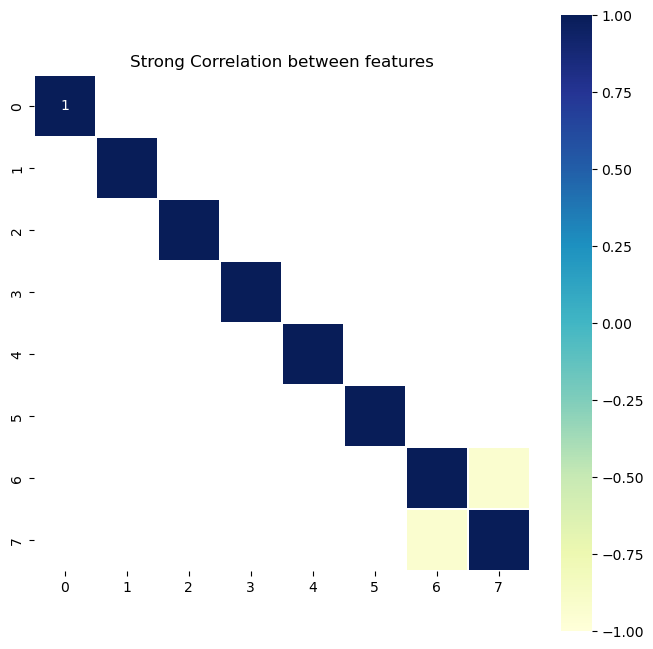

In [44]:
plt.figure(figsize=(8,8))
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)],
           cmap='YlGnBu',vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True,square=True);
plt.title('Strong Correlation between features')

##### 6.1.4.2 Variance Inflation Factor(VIF)

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
X_train.shape

(16512, 8)

In [48]:
vif_df = pd.DataFrame()
vif_df['Features'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 
vif_df

Features        VIF
0      MedInc   2.706434
1    HouseAge   1.255792
2    AveRooms   2.609482
3   AveBedrms   1.365012
4  Population   1.228339
5    AveOccup   1.146465
6    Latitude  11.231488
7   Longitude  10.778198

In [49]:
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

##### 6.1.4.3 Using Principal Component Analysis (PCA)
- PCA can combine features into a new set of uncorrelated features. 
- This is particularly useful if the features are linearly related.

Combining `Latitude` and `Longitude` into a single `Location` feature using Principal Component Analysis (PCA).

In [51]:
from sklearn.decomposition import PCA

In [52]:
location = X_train[[6,7]]

In [53]:
# Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 component
principal_components = pca.fit_transform(location)

In [54]:
# Create a DataFrame with the new feature
X_train = X_train.drop(columns=[6,7])
X_train[6] = principal_components

print(X_train)

              0         1         2         3         4         5         6
0      0.414754 -1.921393  1.444705  0.896127 -1.966682  0.858764 -0.838722
1      0.491826  1.761074  0.130526  0.388785  0.323580  0.661007  1.042717
2      0.250740 -0.162235 -0.373492 -0.082114 -0.215766 -0.027992 -0.838722
3     -1.785685  0.755827 -1.676031 -0.436925 -0.630163  0.986486 -0.719936
4     -0.214024  1.761074 -0.867931 -0.108089 -0.069065 -1.492986 -0.674800
...         ...       ...       ...       ...       ...       ...       ...
16507  0.503175 -0.649544  0.569044 -0.087061 -0.694933  0.580918  1.217053
16508 -0.399559 -0.083134  0.146436 -1.305657 -0.815269  0.396228  0.956534
16509 -0.199677  0.228134 -1.370825 -1.200684 -0.709276 -1.928866  0.614269
16510  1.041028  0.456724 -0.481973  0.080023 -0.175649 -0.909975 -0.982424
16511 -1.885521 -1.076247 -1.058860  0.388785 -0.213063  0.784503 -1.601200

[16512 rows x 7 columns]


In [55]:
vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(X_train,i) for i in range (X_train.shape[1])] 
vif_df

VIF
0  2.244397
1  1.182383
2  2.295629
3  1.362229
4  1.225387
5  1.142931
6  1.101990

### 6.2 Target Transformation 

In [57]:
# Converting to Pandas DataFrame
y_train = pd.DataFrame(y_train)

In [58]:
y_train.head()

MedHouseVal
12069      5.00001
15925      2.70000
11162      1.96100
4904       1.18800
4683       2.25000

C:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

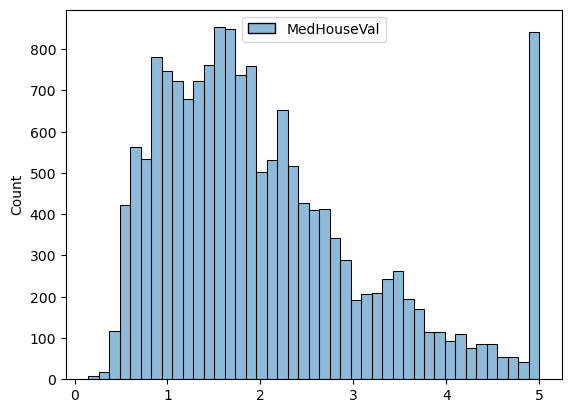

In [59]:
# Visualizing the target variable
sns.histplot(y_train)

#### Power Transformation

In [61]:
pt2 = PowerTransformer(method='yeo-johnson')
y_train = pt2.fit_transform(y_train)

C:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

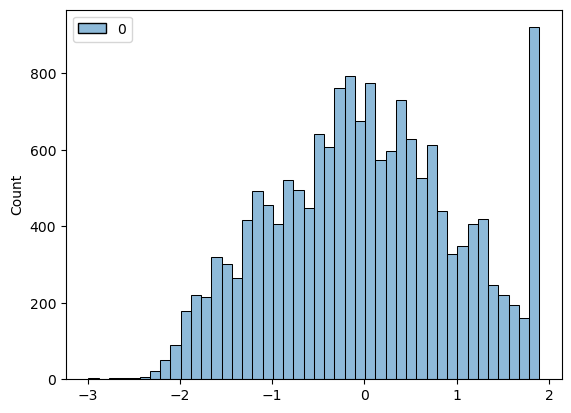

In [62]:
sns.histplot(y_train)

### 6.3 Test Data Transformation

#### 6.3.1 Yeo-Johnson Power Transformation

In [65]:
X_test = pt1.transform(X_test)

In [66]:
# Converting to Pandas DataFrame
X_test = pd.DataFrame(X_test)
X_test.head()

0         1         2         3         4         5         6  \
0  0.369303 -0.484487  0.358146  0.179135  0.389430  1.460722 -1.784321   
1  1.098277  0.304765  0.632918 -1.372354  0.121665  0.302552 -0.778834   
2  0.471133  0.073486  0.526963 -0.272167  0.392371  0.157181  1.330745   
3 -0.764783  0.681621 -0.114366  1.739763 -1.408980 -0.072551 -1.287361   
4  0.780789 -0.241893 -0.679131 -0.143971 -0.811431 -2.138601  1.062870   

              7  
0  5.551115e-15  
1  3.330669e-15  
2 -4.829470e-15  
3  9.298118e-15  
4 -5.911938e-15

#### 6.3.2 Handling Outliers 

<b>Replacing Outliers with Upper/Lower Bound Using IQR:</b>

Replacing outliers with upper/lower bounds using IQR involves calculating the interquartile range (IQR) of a numerical column. Outliers are values above Q3 + 1.5 * IQR or below Q1 - 1.5 * IQR. These outliers are then replaced with the nearest boundary (either Q3 + 1.5 * IQR or Q1 - 1.5 * IQR).

In [69]:
for column in X_test.columns:
    Q1 = X_test[column].quantile(0.25)
    Q3 = X_test[column].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR
    LL = Q1 - 1.5 * IQR
    X_test[column] = np.where(X_test[column] > UL, UL, X_test[column])
    X_test[column] = np.where(X_test[column] < LL, LL, X_test[column])

#### 6.3.3 Handling Skewness
- If skewness is less than -1 or greater than +1, the distribution is highly skewed.
- If skewness is between -1 and -1/2 or between +1/2 and +1, the distribution is moderately skewed.
- If skewness is between -1/2 and +1/2, the distribution is approximately skewed.

In [71]:
from scipy.stats import skew
# Calculate skewness
skewness = X_test.apply(skew)
print("Skewness of Features:\n", skewness)

Skewness of Features:
 0    0.030982
1   -0.100434
2   -0.227416
3    0.224210
4    0.054298
5   -0.164560
6    0.123107
7   -0.171462
dtype: float64


In [72]:
# Identify moderately skewed columns
moderately_skewed_columns = skewness[(skewness >= 0.5) | (skewness <= -0.5)].index
print("Moderately skewed features:\n", moderately_skewed_columns)

Moderately skewed features:
 Index([], dtype='int64')


#### 6.3.4 Handling Multicollinearity

Combining `Latitude` and `Longitude` into a single `Location` feature using Principal Component Analysis (PCA).

In [75]:
location = X_test[[6,7]]

In [76]:
# Apply PCA
principal_components = pca.transform(location)

In [77]:
# Create a DataFrame with the new feature
X_test = X_test.drop(columns=[6,7])
X_test[6] = principal_components

#### 6.3.5 Target Transformation 

In [79]:
# Converting to Pandas DataFrame
y_test = pd.DataFrame(y_test)

In [80]:
y_test = pt2.transform(y_test)

## 7. Linear Regression Modelling

### 7.1 Building a Linear Regression Model

In [83]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [84]:
# Fit the model to the training data
model.fit(X_train,y_train)

LinearRegression()

In [85]:
#Predictions 
y_pred = model.predict(X_test)

### 7.2 Model Evaluation

In [87]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

#### 7.2.1 R-squared
Represents the proportion of variance in the target variable that is predictable from the features.

##### $ R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}} $
- ${\text{SS}_{\text{res}}}$ is the sum of squared residuals.
- ${\text{SS}_{\text{tot}}}$ is the total sum of squares.


In [89]:
r2 = r2_score(y_test, y_pred)
r2

0.5985366445043653

#### 7.2.2 Mean Absolute Error (MAE)
Measures the average magnitude of errors in the predictions, without considering their direction.

##### $ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $- n is the number of observations.
- $y_i$ is the actual value.
- $\hat{y}_i$ is the predicted value.


In [91]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.4811661763062738

#### 7.2.3 Mean Squared Error (MSE)
Measures the average of the squares of the errors, giving more weight to larger errors

##### $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $
- n is the number of observations.
- $y_i$ is the actual value.
- $\hat{y}_i$ is the predicted value. 

In [93]:
mse = mean_squared_error(y_test, y_pred)
mse

0.39536139905175105

#### 7.2.4 Root Mean Squared Error (RMSE)
The square root of the Mean Squared Error, providing error metrics in the same units as the target variable.

##### $ \text{RMSE} = \sqrt{\text{MSE}} $. 

In [95]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.628777702412984

#### 7.2.5 Adjusted R-squared
- Adjusted R-squared accounts for the number of predictors in the model. It is useful for comparing models with different numbers of predictors.

##### $$ \text{Adjusted } R^2 = 1 - \left( \frac{1 - R^2}{n - 1} \times (n - p - 1) \right) $$- $R^2$ is the R-squared value.
- n is the number of observations.
- p is the number of predictors.


In [97]:
n = len(y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adj_r2

0.5978545465702707

### 7.3 Residual Analysis

#### 7.3.1 Calculating Residuals
Residuals are the differences between the observed values and the predicted values.

##### $ \epsilon_i = y_i - \hat{y}_i $

In [100]:
residuals = y_test - y_pred

#### 7.3.2 Residuals vs. Fitted Values Plot

Text(0.5, 1.0, 'Residuals vs Fitted values')

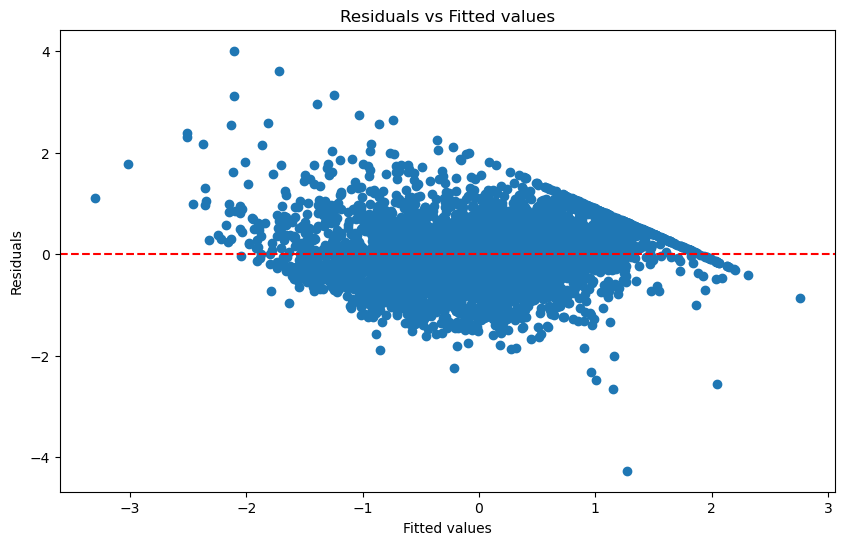

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')

The residual plot indicates a funnel-shaped pattern, suggesting `heteroscedasticity` where the variance of residuals increases with fitted values. This implies that the model's errors are not constant across all levels, potentially indicating a **more complex model** to address this issue.

#### 7.3.3 Histogram of Residuals

C:\Users\vaibh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


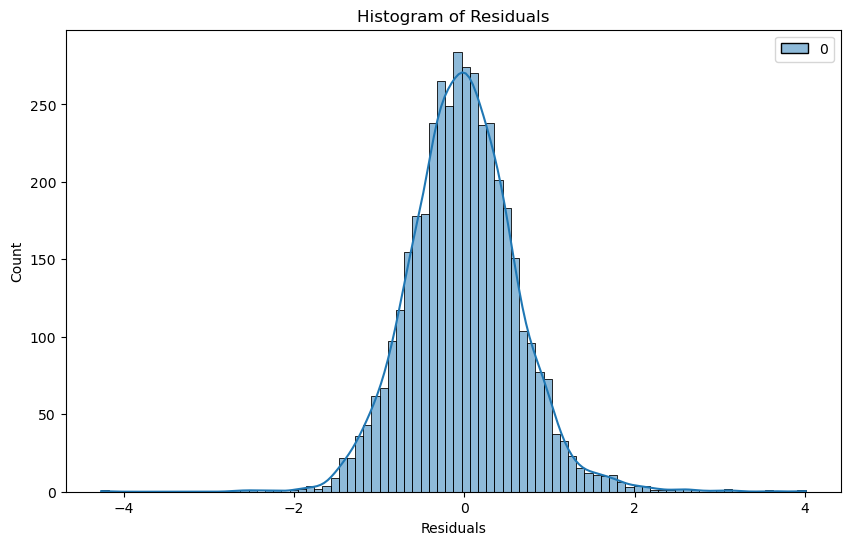

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

The histogram of residuals shows a roughly normal distribution, centered around zero, with a slight left skew. This indicates that the residuals are mostly symmetrically distributed but with some potential outliers or skewness. The normality of residuals is a good sign for the linear regression model’s validity.

#### 7.3.3 Q-Q Plot of Residuals
A QQ plot of residuals compares the quantiles of the residuals to the quantiles of a theoretical normal distribution. If the residuals are normally distributed, the points will lie close to the 45-degree reference line. Deviations from this line suggest deviations from normality, such as skewness or kurtosis.

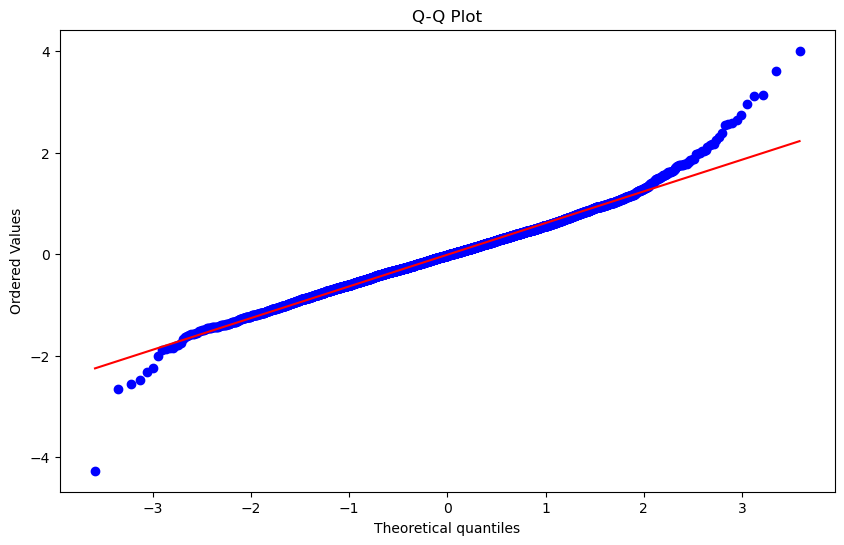

In [108]:
# Ensure residuals are in a 1-dimensional array
residuals = np.ravel(residuals)

# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

#### 7.3.5 Shapiro-Wilk Test for normality
The Shapiro-Wilk test is a hypothesis test that is applied to a sample with a null hypothesis that the sample has been generated from a normal distribution. If the p-value is low, we can reject such a null hypothesis and say that the sample has not been generated from a normal distribution.

In [110]:
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}')

Shapiro-Wilk Test: Statistic=0.984, p-value=0.000


The low p-value suggests that we can reject the null hypothesis of the normality of the residuals.

### 7.4 Cross-validation Analysis

Cross-validation in linear regression assesses model performance by partitioning the dataset into multiple folds. Each fold serves as a test set while the remaining data is used for training. This process provides a robust estimate of the model’s generalization ability and helps identify potential overfitting or underfitting.

In [113]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

In [114]:
# cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.626016   0.61000125 0.61212673 0.62766645 0.60737863]
Mean CV Score: 0.6166378107132646
Standard Deviation of CV Scores: 0.00848183562807982
